# Jonathan's Project Notes


## Bollinger Bands

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
from stockstats import StockDataFrame as sdf


In [2]:
# Load env data
load_dotenv()


True

In [3]:
# Assign Alpaca keys to variables
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")


In [4]:
# Initialize Alpaca connection
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


In [5]:
# Set start and end dates for
start_date = pd.Timestamp('2020-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-12-31', tz='America/New_York').isoformat()


In [6]:
# Assign default ticker symbol
ticker_string = 'JPM'
ticker = [ticker_string]


In [7]:
# Assign default time frame
timeframe = '15Min'


In [8]:
# Get ticker historical data
df_ohlc_original = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df


In [9]:
# Copy of original data
df_ohlc = df_ohlc_original

# Verify data in dataframe
df_ohlc = df_ohlc[ticker_string]
df_ohlc.head()


,open,high,low,close,volume
time,,,,,
2020-01-02 09:30:00-05:00,140.070,140.14,139.52,139.670,29953
2020-01-02 09:45:00-05:00,139.675,139.91,139.44,139.670,24343
2020-01-02 10:00:00-05:00,139.635,139.81,139.52,139.640,19021
2020-01-02 10:15:00-05:00,139.600,139.60,139.34,139.400,18856
2020-01-02 10:30:00-05:00,139.460,139.54,139.28,139.535,19695


In [10]:
# Window size
bollinger_band_window = 20
num_standard_deviation = 2

# Calculate mean and standard deviation
df_ohlc['bollinger_band_middle'] = df_ohlc['close'].rolling(window=bollinger_band_window).mean()
df_ohlc['bollinger_band_std'] = df_ohlc['close'].rolling(window=bollinger_band_window).std()

# Calculate upper bollinger band and lower bollinger band
df_ohlc['bollinger_band_upper'] = df_ohlc['bollinger_band_middle'] + (df_ohlc['bollinger_band_std'] * num_standard_deviation)
df_ohlc['bollinger_band_lower'] = df_ohlc['bollinger_band_middle'] - (df_ohlc['bollinger_band_std'] * num_standard_deviation)

df_ohlc.head()


,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower
time,,,,,,,,,
2020-01-02 09:30:00-05:00,140.070,140.14,139.52,139.670,29953,NaN,NaN,NaN,NaN
2020-01-02 09:45:00-05:00,139.675,139.91,139.44,139.670,24343,NaN,NaN,NaN,NaN
2020-01-02 10:00:00-05:00,139.635,139.81,139.52,139.640,19021,NaN,NaN,NaN,NaN
2020-01-02 10:15:00-05:00,139.600,139.60,139.34,139.400,18856,NaN,NaN,NaN,NaN
2020-01-02 10:30:00-05:00,139.460,139.54,139.28,139.535,19695,NaN,NaN,NaN,NaN


In [11]:
# Create signal for long
df_ohlc['bollinger_band_long'] = np.where(df_ohlc['close'] > df_ohlc['bollinger_band_upper'], 1.0, 0.0)
df_ohlc.loc[df_ohlc['bollinger_band_long'] == 1.0].head()


,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,bollinger_band_long
time,,,,,,,,,,
2020-01-06 15:45:00-05:00,137.810,138.270,137.800,138.210,49640,137.65825,0.185304,138.028858,137.287642,1.0
2020-01-08 11:30:00-05:00,136.720,137.135,136.420,137.135,21206,136.42250,0.318357,137.059214,135.785786,1.0
2020-01-08 11:45:00-05:00,137.200,137.400,137.070,137.240,13245,136.48500,0.350098,137.185195,135.784805,1.0
2020-01-13 13:00:00-05:00,136.315,136.480,136.295,136.460,6740,136.06925,0.178990,136.427231,135.711269,1.0
2020-01-13 15:45:00-05:00,136.950,137.170,136.880,137.170,57073,136.44800,0.357095,137.162190,135.733810,1.0


In [12]:
df_ohlc.dropna(inplace=True)
df_ohlc.isna().sum()


open                     0
high                     0
low                      0
close                    0
volume                   0
bollinger_band_middle    0
bollinger_band_std       0
bollinger_band_upper     0
bollinger_band_lower     0
bollinger_band_long      0
dtype: int64

<AxesSubplot:title={'center':'JPM Bollinger Bands'}, xlabel='Date and Time', ylabel='Price (US Dollars)'>

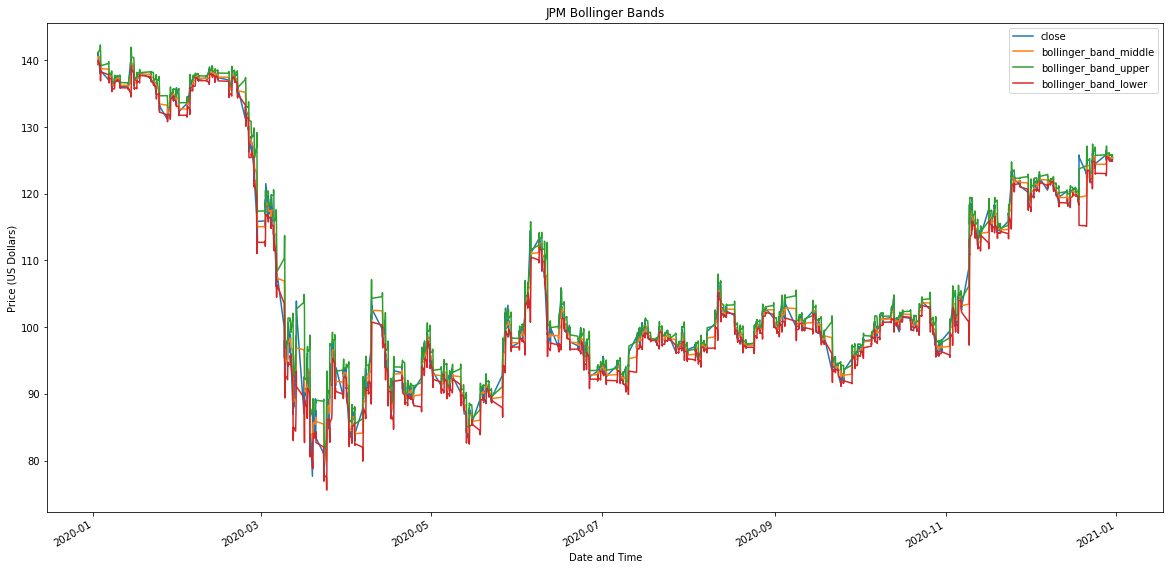

In [13]:
# Plot Bollinger Bands with closing prices to visually see data
df_ohlc[['close', 'bollinger_band_middle', 'bollinger_band_upper', 'bollinger_band_lower']].plot(figsize=(20,10), title='JPM Bollinger Bands', xlabel='Date and Time', ylabel='Price (US Dollars)')


In [14]:
# Bollinger Band function to capture signal
def bollinger_band_signal_generator(dataframe_name, closing_price_column_name = 'close', bollinger_band_window = 20, num_standard_deviation = 2):
    """Creates Bollinger Band indicator with signal for long position based on closing price
    Args:
        dataframe_name (dict): Single security dataframe containing at least closing prices
        closing_price_column_name (str): Name of column in dataframe containing closing prices
        bollinger_band_window (int): Desired timeframe window used for rolling calculations
        num_standard_deviation (int): Desired number of standard deviations to calculate
    Returns:
        A dataframe of:
            original data passed to function,
            bollinger_band_middle (flt): Column of values for middle band,
            bollinger_band_std (flt): Column of values to calculate standard deviation,
            bollinger_band_upper (flt): Column of values for upper band,
            bollinger_band_lower (flt): Column of values for lower band,
            bollinger_band_long (flt): Column of generated signals (1.0 = True, 0.0 = False)
    """
    # Calculate mean and standard deviation
    dataframe_name['bollinger_band_middle'] = dataframe_name[closing_price_column_name].rolling(window=bollinger_band_window).mean()
    dataframe_name['bollinger_band_std'] = dataframe_name[closing_price_column_name].rolling(window=bollinger_band_window).std()

    # Calculate upper bollinger band and lower bollinger band
    dataframe_name['bollinger_band_upper'] = dataframe_name['bollinger_band_middle'] + (dataframe_name['bollinger_band_std'] * num_standard_deviation)
    dataframe_name['bollinger_band_lower'] = dataframe_name['bollinger_band_middle'] - (dataframe_name['bollinger_band_std'] * num_standard_deviation)

    # Create signal column
    dataframe_name['bollinger_band_long'] = np.where(dataframe_name[closing_price_column_name] > dataframe_name['bollinger_band_upper'], 1.0, 0.0)
    
    # Drop NaN values
    dataframe_name.dropna(inplace=True)

    # Return dataframe with features and target
    return dataframe_name


In [15]:
# Test bollinger band function
testing_df = df_ohlc_original['JPM']
new_boll_df = bollinger_band_signal_generator(testing_df, 'close')
new_boll_df[:30]


,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,bollinger_band_long
time,,,,,,,,,,
2020-01-02 14:15:00-05:00,140.575,140.770,140.525,140.730,20048,140.19825,0.420517,141.039285,139.357215,0.0
2020-01-02 14:30:00-05:00,140.745,140.870,140.690,140.870,13698,140.25825,0.426742,141.111734,139.404766,0.0
2020-01-02 14:45:00-05:00,140.845,140.980,140.800,140.980,22353,140.32375,0.432200,141.188150,139.459350,0.0
2020-01-02 15:00:00-05:00,140.960,140.985,140.865,140.870,70068,140.38525,0.417030,141.219311,139.551189,0.0
2020-01-02 15:15:00-05:00,140.865,140.890,140.780,140.820,75963,140.45625,0.357023,141.170296,139.742204,0.0
2020-01-02 15:30:00-05:00,140.815,140.910,140.775,140.840,20290,140.52150,0.293370,141.108240,139.934760,0.0
2020-01-02 15:45:00-05:00,140.820,141.060,140.790,141.060,144672,140.57850,0.280831,141.140162,140.016838,0.0
2020-01-03 09:30:00-05:00,137.340,138.370,137.300,138.055,59857,140.47825,0.623938,141.726125,139.230375,0.0
2020-01-03 09:45:00-05:00,138.080,138.330,137.970,138.210,30184,140.38200,0.802579,141.987157,138.776843,0.0


In [16]:
# Bollinger Band generator function
def bollinger_band_generator(dataframe_name, closing_price_column_name = 'close', bollinger_band_window = 20, num_standard_deviation = 2):
    """Creates Bollinger Band function
    Args:
        dataframe_name (dict): Single security dataframe containing at least closing prices
        closing_price_column_name (str): Name of column in dataframe containing closing prices
        bollinger_band_window (int): Desired timeframe window used for rolling calculations
        num_standard_deviation (int): Desired number of standard deviations to calculate
    Returns:
        A dataframe of:
            original data passed to function,
            bollinger_band_middle (flt): Column of values for middle band,
            bollinger_band_std (flt): Column of values to calculate standard deviation,
            bollinger_band_upper (flt): Column of values for upper band,
            bollinger_band_lower (flt): Column of values for lower band,
    """

    # Calculate mean and standard deviation
    dataframe_name['bollinger_band_middle'] = dataframe_name[closing_price_column_name].rolling(window=bollinger_band_window).mean()
    dataframe_name['bollinger_band_std'] = dataframe_name[closing_price_column_name].rolling(window=bollinger_band_window).std()

    # Calculate upper bollinger band and lower bollinger band
    dataframe_name['bollinger_band_upper'] = dataframe_name['bollinger_band_middle'] + (dataframe_name['bollinger_band_std'] * num_standard_deviation)
    dataframe_name['bollinger_band_lower'] = dataframe_name['bollinger_band_middle'] - (dataframe_name['bollinger_band_std'] * num_standard_deviation)

    # Drop NaN values
    dataframe_name.dropna(inplace=True)

    # Return dataframe with features and target
    return dataframe_name


In [17]:
# EWMA generator function
def ewma(dataframe_name, closing_price_column_name = 'close', fast_ema = 9, slow_ema = 21):
    # create EMAs columns
    dataframe_name['EMA9'] = dataframe_name[closing_price_column_name].ewm(span=fast_ema, adjust=False).mean()
    dataframe_name['EMA21'] = dataframe_name[closing_price_column_name].ewm(span=slow_ema, adjust=False).mean()

    # Return dataframe with features and target
    return dataframe_name


In [18]:
# Signal generator function
def signals_generator(dataframe_name):
    """Creates signals for long position
    Args:
        dataframe_name (dict): Dataframe containing indicator data for Bollinger Bands, EWMA, and Keltner Channels
    Returns:

    """
    
    # Create signal for bollinger band is inside keltner channel
    selection = dataframe_name.loc[((dataframe_name['bollinger_band_upper'] < dataframe_name['kcup']) & (dataframe_name['bollinger_band_lower'] >= dataframe_name['kclo'])), :].index
    dataframe_name['squeeze'] = 0.0
    dataframe_name['squeeze'][selection] = 1

    # Create signal for crossover band
    selection2 = dataframe_name.loc[((dataframe_name['EMA9'] > dataframe_name['EMA21']) & (dataframe_name['EMA9'].shift(1) < dataframe_name['EMA21'].shift(1))), :].index
    dataframe_name['crossover'] = 0.0
    dataframe_name['crossover'][selection2] = 1

    # Target generation
    selection3 = dataframe_name.loc[((dataframe_name['squeeze'] == 1.0) & (dataframe_name['crossover'] == 1.0)), :].index
    dataframe_name['target'] = 0.0
    dataframe_name['target'][selection3] = 1

    # Return dataframe with features and target
    return dataframe_name


In [19]:
# Target generator function for model testing data
def target_generator(dataframe_name, squeeze_sig_col_name = 'squeeze', crossover_sig_col_name = 'crossover'):
    """Creates targets based on signals for model testing
    Args:
        dataframe_name (dict): Dataframe containing indicator data for Bollinger Bands, EWMA, and Keltner Channels
        boll_kelt_sig_col_name (str): Name of column in dataframe containing bollinger keltner signals
        crossover_sig_col_name (str): Name of column in dataframe containing ewma crossover signals
    Returns:
        A dataframe of:
            original data passed to function,
            appended target signals of type float (1.0 = True, 0.0 = False)
    """

    # Create target column
    dataframe_name['target'] = np.where(dataframe_name[boll_kelt_sig_col_name] == 1.0 and dataframe_name[crossover_sig_col_name] == 1.0, 1.0, 0.0)

    # Return target dataframe
    return df


In [20]:
def keltner_channel(df_ohlc, p_length = 20):
    
    stock = sdf.retype(df_ohlc)
    atr_column = pd.DataFrame(stock['atr'])
    df_final = df_ohlc
    df_final['atr'] = atr_column
    df_final['kcmid'] = df_final['close'].rolling(window=p_length).mean()
    df_final['kcup'] = df_final['kcmid']+df_final['atr']
    df_final['kclo'] = df_final['kcmid']-df_final['atr']
    
    return df_final
    

In [21]:
"""test2_df = df_ohlc_original['JPM']  # this is where ohlc function would go
new_df_with_bol = bollinger_band_generator(test2_df, 'close')
new_df_with_kelt = keltner_channel(new_df_with_bol)
new_df_with_ewma = ewma(new_df_with_kelt)
signals_df = signals_generator(new_df_with_ewma)
#target_df = target_generator(signals_df, 'boll_signal', 'kelt_signal', 'crossover_signal')
signals_df.head()
"""

"test2_df = df_ohlc_original['JPM']  # this is where ohlc function would go\nnew_df_with_bol = bollinger_band_generator(test2_df, 'close')\nnew_df_with_kelt = keltner_channel(new_df_with_bol)\nnew_df_with_ewma = ewma(new_df_with_kelt)\nsignals_df = signals_generator(new_df_with_ewma)\n#target_df = target_generator(signals_df, 'boll_signal', 'kelt_signal', 'crossover_signal')\nsignals_df.head()\n"

In [22]:
test2_df = df_ohlc_original['JPM']  # this is where ohlc function would go
new_df_with_bol = bollinger_band_generator(test2_df, 'close')
new_df_with_kelt = keltner_channel(new_df_with_bol)
new_df_with_ewma = ewma(new_df_with_kelt)
new_df_with_everything = signals_generator(new_df_with_ewma)
new_df_with_everything.head()

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,...,tr_14_smma,atr,kcmid,kcup,kclo,EMA9,EMA21,squeeze,crossover,target
time,,,,,,,,,,,,,,,,,,,,,
2020-01-02 14:15:00-05:00,140.575,140.770,140.525,140.73,20048,140.19825,0.420517,141.039285,139.357215,NaN,...,NaN,NaN,NaN,NaN,NaN,140.730000,140.730000,0.0,0.0,0.0
2020-01-02 14:30:00-05:00,140.745,140.870,140.690,140.87,13698,140.25825,0.426742,141.111734,139.404766,140.73,...,0.180000,0.180000,NaN,NaN,NaN,140.758000,140.742727,0.0,0.0,0.0
2020-01-02 14:45:00-05:00,140.845,140.980,140.800,140.98,22353,140.32375,0.432200,141.188150,139.459350,140.87,...,0.180000,0.180000,NaN,NaN,NaN,140.802400,140.764298,0.0,0.0,0.0
2020-01-02 15:00:00-05:00,140.960,140.985,140.865,140.87,70068,140.38525,0.417030,141.219311,139.551189,140.98,...,0.158501,0.158501,NaN,NaN,NaN,140.815920,140.773907,0.0,0.0,0.0
2020-01-02 15:15:00-05:00,140.865,140.890,140.780,140.82,75963,140.45625,0.357023,141.170296,139.742204,140.87,...,0.144996,0.144996,NaN,NaN,NaN,140.816736,140.778097,0.0,0.0,0.0
